# TensorFlow Introduction: MNIST for ML Beginners

In this codelab, we will see how to recognize hand-written digits with a simple neural network running on TensorFlow.
This is based on [TensorFlow Tutorial](https://www.tensorflow.org/versions/master/tutorials/mnist/beginners/index.html).

![](https://dl.dropboxusercontent.com/u/4207279/public/public_images/Screen%20Shot%202017-02-18%20at%206.04.53%20PM.png)

## The full code

In [123]:
# import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

# define a neural network
import tensorflow as tf
x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
y = tf.nn.softmax(tf.matmul(x, W) + b)

# define the train step
y_ = tf.placeholder(tf.float32, [None, 10])
cross_entropy = -tf.reduce_sum(y_ * tf.log(y))
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)

# initialize variables and session
init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)

# train the model mini batch with 100 elements, for 1K times
for i in range(1000):
  batch_xs, batch_ys = mnist.train.next_batch(100)
  sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
  
# evaluate the accuracy
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
print
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz

0.908


# Loading MNIST training data

Preparing the sample image data.

In [124]:
# import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


## Training Images

![mnist.train.xs](https://dl.dropboxusercontent.com/u/4207279/public/public_images/Screen%20Shot%202017-02-18%20at%2011.17.39%20AM.png)

## Single image = 784 values, ranges from 0.0 (white) to 1.0 (black)

![](https://dl.dropboxusercontent.com/u/4207279/public/public_images/Screen%20Shot%202017-02-18%20at%206.06.25%20PM.png)

In [152]:
# check MNIST training images matrix shape
mnist.train.images.shape

(55000, 784)

In [153]:
# check MNIST training images matrix data
sample_img = mnist.train.images[5].reshape(28, 28)
sample_img

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.    

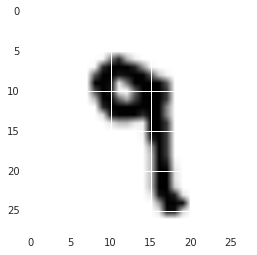

In [154]:
# plot the image
import matplotlib.pyplot as plt
plt.imshow(sample_img).set_cmap('Greys')

## Training Labels

We also need the labels for each image to train the model.

![mnist.train.ys](https://dl.dropboxusercontent.com/u/4207279/public/public_images/Screen%20Shot%202017-02-18%20at%2011.21.20%20AM.png)

In [155]:
# check MNIST labels shape
mnist.train.labels.shape

(55000, 10)

In [156]:
# show MNIST label data
sample_label = mnist.train.labels[5]
sample_label

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.])

# Defining a Neural Network

## Single neuron recognizes single digit

A neuron takes 784 inputs, mutiplies them with weights, and checks if the sum exceeds a threthold. 

![](https://dl.dropboxusercontent.com/u/4207279/public/public_images/Screen%20Shot%202017-02-18%20at%206.08.38%20PM.png)

## Define a neural network as a graph:

One neuron for each digit, total 10 neurons.

![](https://dl.dropboxusercontent.com/u/4207279/public/public_images/Screen%20Shot%202017-02-18%20at%2011.22.26%20AM.png)

## Or, as a matrix operation:

It's much easier to use matrix operation to write this!

![](https://dl.dropboxusercontent.com/u/4207279/public/public_images/Screen%20Shot%202017-02-18%20at%2011.22.40%20AM.png)

<br/>
$${\Huge y=softmax(Wx + b)}$$
<br/>
<br/>
<br/>

## Or, as a TensorFlow graph:

In TensorFlow, you'll define a "graph" of the calculations.

In [147]:
# define a neural network (softmax logistic regression)
import tensorflow as tf
x = tf.placeholder(tf.float32, [None, 784]) # a placeholder for inputting the image 
W = tf.Variable(tf.zeros([784, 10])) # weights
b = tf.Variable(tf.zeros([10])) # biases
y = tf.nn.softmax(tf.matmul(x, W) + b)

## The trained weights will look like this:
After a training, the weights will look like this. The blue area has **positive** weights, and the red area has **negative** weights.

![](https://dl.dropboxusercontent.com/u/4207279/public/public_images/Screen%20Shot%202017-02-18%20at%2011.22.14%20AM.png)

## What is Softmax?

Softmax converts an array of values into an array of **probabilities** (0 - 1.0).

<br/>
<br/>
<br/>
$${\Huge softmax(n) = \frac{\exp n_i}{\sum \exp n_i}}$$
<br/>
<br/>
<br/>

<Container object of 10 artists>

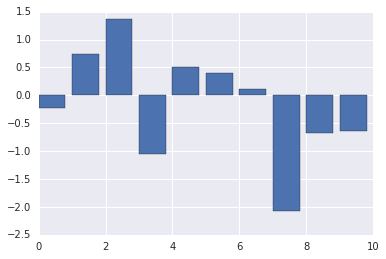

In [148]:
import numpy as np
i = np.arange(0, 10)
n = np.random.randn(10)
plt.bar(i, n)

1.0

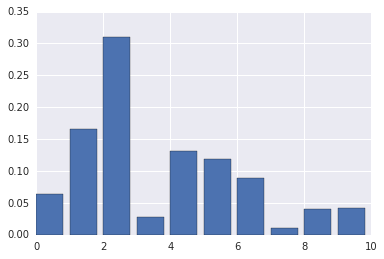

In [149]:
def softmax(n):
  return np.exp(n) / np.sum(np.exp(n))

s = softmax(n)
plt.bar(i, s)
np.sum(s)

# Defining the Train Step

Once you have defined the network, you define how to train it.

In [138]:
# define the train step to minimize the cross entropy with SGD
y_ = tf.placeholder(tf.float32, [None, 10]) # the training labels
cross_entropy = -tf.reduce_sum(y_ * tf.log(y))
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)

## What is Cross Entropy?

Cross Entropy returns **higher value for wrong answers, lower value for correct answers**. Used as a **loss function** for the training to evaluate how much error the network makes.

<br/>
<br/>
<br/>
$${\Huge cross\_entropy (x, y) = - \sum   y_{i}  log(x_{i})}$$
<br/>
<br/>
<br/>

<Container object of 10 artists>

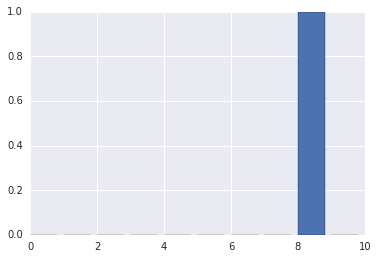

In [139]:
# label
label = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0])
plt.bar(i, labels)

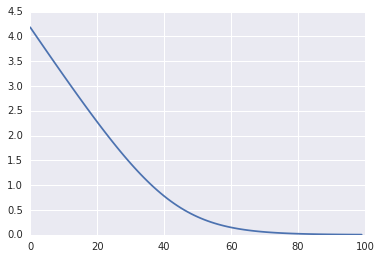

In [140]:
def cross_entropy(values, labels):
  return -np.sum(labels * np.log(values))

# simulate the training
x_ents = []
for i in range(0, 100):
  x_ents.append(cross_entropy(softmax(n), label))
  n[8] += 0.1
plt.plot(x_ents)

## Use Gradient Decent to find the optimal weights
TensorFlow finds the "gradient" with differentiation and move weights and biases towards the dirrection with less error.
![](https://dl.dropboxusercontent.com/u/4207279/public/public_images/Screen%20Shot%202017-02-18%20at%2011.13.57%20AM.png)

# Training with mini batch

Randomly selects 100 samples from the 55K images and calculates the gradient. Repeats 1K times.

In [141]:
# initialize variables and session
init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)

# train the model mini batch with 100 elements, for 1K times
for i in range(1000):
  batch_xs, batch_ys = mnist.train.next_batch(100)
  sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

# Test

Let's see how accurate the model is.

In [142]:
# evaluate the accuracy of the model
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.9015


# Today We Learned

- **Single neuron** can take an image and recognize a digit
- **Matrix operation** (y = Wx + b) can define a neural network concisely
- **Softmax** converts the result to probabilities (0.0 - 1.0)
- **Cross Entropy** evaluates how much error the network makes (the loss function)
- **Gradient Decent** moves weights and biases toward the direction with less error
- **Mini Batch** trains the network with small batch of data